# Machine Learning Project

### Naive Bayes Classifier in the Entertainment Industry
### Paper: MusicMood

## Aleena Kynat

We are building a Naive Bayes classifier inspired by Sebastian Raschka's MusicMood, but instead of song lyrics we are using a combination of two movie databases to build a classification model that will predict movie genres based on the plot/overview/keywords.

### Cleaning the Data

We combine two csv files to build one dataset, then drop the unnecessary and irrelevant columns.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1=pd.read_csv('tmdb_5000_movies.csv')
data2=pd.read_csv('movie_metadata.csv')
data2.drop(['color','cast_total_facebook_likes','movie_imdb_link','director_facebook_likes','actor_3_facebook_likes',
            'actor_1_facebook_likes','actor_2_facebook_likes','aspect_ratio','content_rating','num_user_for_reviews',
            'num_critic_for_reviews','movie_facebook_likes'],axis=1,inplace=True)
data2.drop(['num_voted_users','facenumber_in_poster','director_name'],axis=1,inplace=True)
data1.drop(['vote_count','keywords','original_language','homepage','genres','status','spoken_languages',
            'production_countries','production_companies','title'],axis=1,inplace=True)

data1['title_year'] = pd.DatetimeIndex(data1['release_date']).year
data1.drop('release_date',axis=1,inplace=True)
data2.drop(['actor_1_name','actor_2_name','actor_3_name'],axis=1,inplace=True)
movie=data1.merge(data2,how='outer',on=['budget','title_year'])
movie.drop('original_title',axis=1,inplace=True)
movie=movie.rename(index=str, columns={"movie_title": "title"})

In [0]:
movie

,budget,id,overview,popularity,revenue,runtime,tagline,vote_average,title_year,duration,gross,genres,title,plot_keywords,language,country,imdb_score
0,237000000.0,19995.0,"In the 22nd century, a paraplegic Marine is di...",150.437577,2.787965e+09,162.0,Enter the World of Pandora.,7.2,2009.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,English,USA,7.9
1,300000000.0,285.0,"Captain Barbossa, long believed to be dead, ha...",139.082615,9.610000e+08,169.0,"At the end of the world, the adventure begins.",6.9,2007.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,English,USA,7.1
2,245000000.0,206647.0,A cryptic message from Bond’s past sends him o...,107.376788,8.806746e+08,148.0,A Plan No One Escapes,6.3,2015.0,148.0,200074175.0,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,English,UK,6.8
3,250000000.0,49026.0,Following the death of District Attorney Harve...,112.312950,1.084939e+09,165.0,The Legend Ends,7.6,2012.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,English,USA,8.5
4,250000000.0,49051.0,"Bilbo Baggins, a hobbit enjoying his quiet lif...",108.849621,1.021104e+09,169.0,From the smallest beginnings come the greatest...,7.0,2012.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,English,USA,8.5
6,258000000.0,559.0,The seemingly invincible Spider-Man goes up ag...,115.699814,8.908716e+08,139.0,The battle within.,5.9,2007.0,156.0,336530303.0,Action|Adventure|Romance,Spider-Man 3,sandman|spider man|symbiote|venom|villain,English,USA,6.2
7,258000000.0,559.0,The seemingly invincible Spider-Man goes up ag...,115.699814,8.908716e+08,139.0,The battle within.,5.9,2007.0,156.0,336530303.0,Action|Adventure|Romance,Spider-Man 3,sandman|spider man|symbiote|venom|villain,English,USA,6.2
8,260000000.0,38757.0,When the kingdom's most wanted-and most charmi...,48.681969,5.917949e+08,100.0,They're taking adventure to new lengths.,7.4,2010.0,100.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,17th century|based on fairy tale|disney|flower...,English,USA,7.8
10,250000000.0,767.0,"As Harry begins his sixth year at Hogwarts, he...",98.885637,9.339592e+08,153.0,Dark Secrets Revealed,7.4,2009.0,153.0,301956980.0,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,blood|book|love|potion|professor,English,UK,7.5
11,250000000.0,209112.0,Fearing the actions of a god-like Super Hero l...,155.790452,8.732602e+08,151.0,Justice or revenge,5.7,2016.0,183.0,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,based on comic book|batman|sequel to a reboot|...,English,USA,6.9


In [0]:
movie.dropna(inplace=True)

In [0]:
movie.isnull().any()

budget           False
id               False
overview         False
popularity       False
revenue          False
runtime          False
tagline          False
vote_average     False
title_year       False
duration         False
gross            False
genres           False
title            False
plot_keywords    False
language         False
country          False
imdb_score       False
dtype: bool

Now we select only English movies so we can focus our algo on one language.

In [0]:
mov=movie.loc[movie['language'] == 'English']
ungen=mov['genres'].unique()

### Splitting the Genres

In [0]:
import re
from bs4 import BeautifulSoup 
words=[]
for i in range(len(ungen)):
    review_text = BeautifulSoup(ungen[i]).get_text() 
#Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
#split into individual words
    words.append(letters_only.split())
#words
flat_list = [item for sublist in words for item in sublist]
unique_genres=pd.Series(flat_list).unique()
unique_genres=pd.Series(unique_genres)
unique_genres[3]='Sci-Fi'
unique_genres[23]='Film-Noir'
unique_genres.drop(labels=[4,24],axis=0,inplace=True)

C:\Users\aleen\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\aleen\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [0]:
unique_genres

0          Action
1       Adventure
2         Fantasy
3          Sci-Fi
5        Thriller
6         Romance
7       Animation
8          Comedy
9          Family
10        Musical
11        Mystery
12          Drama
13        History
14          Sport
15          Crime
16         Horror
17        Western
18            War
19      Biography
20          Music
21    Documentary
22          Short
23      Film-Noir
dtype: object

We're using plot-keywords, overview and tagline words to predict the Genre of our movie. For this purpose we require only the following part of our dataset:

In [0]:
dfmov=mov.groupby(['overview','tagline','plot_keywords','genres'])['imdb_score'].mean().reset_index()

df=pd.DataFrame()
df['Genre']=unique_genres
ng=pd.DataFrame()
for i in unique_genres.index:
    is_genre = dfmov['genres'].str.contains(unique_genres[i])
    ng=dfmov[is_genre].reset_index()
    ng['Genre']=unique_genres[i]
    df=pd.concat([df,ng],axis=0)
    
df.drop('genres',axis=1,inplace=True)
df.dropna(inplace=True)
df.isnull().any()

C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


Genre            False
imdb_score       False
index            False
overview         False
plot_keywords    False
tagline          False
dtype: bool

In [0]:
df

,Genre,overview,plot_keywords,tagline,words
0,Action,"""Selma,"" as in Alabama, the place where segreg...",american dream|immigrant|new york city|oil|vio...,One dream can change the world.,american dream immigrant new york city oil vio...
1,Action,"""The Hours"" is the story of three women search...",african american|cadillac|disguise|secret agen...,The time to hide is over. The time to regret i...,african american cadillac disguise secret agen...
2,Action,"""The Hours"" is the story of three women search...",casino|french riviera|gambler|heist|partner,The time to hide is over. The time to regret i...,casino french riviera gambler heist partner al...
3,Action,"""The Passion of the Christ"" is a film about th...",actor|arab stereotype|broadway|terrorist|vomiting,"By his wounds, we were healed.",actor arab stereotype broadway terrorist vomit...
4,Action,"""The Passion of the Christ"" is a film about th...",assassin|assassination|bride|death|vengeance,"By his wounds, we were healed.",assassin assassination bride death vengeance a...
5,Action,'We come in peace' is not what those green men...,alien|general|martian|president|weapon,Nice planet. We'll take it!,alien general martian president weapon king ma...
6,Action,16-year-old Cassie Sullivan tries to survive i...,alien|attack|based on novel|based on young adu...,Protect Your Own,alien attack based novel based young adu based...
7,Action,20 years after the dimwits set out on their fi...,brain capacity|drugs|fictional drug|one woman ...,The Second Parts Are More Fools,brain capacity drugs fictional drug one woman ...
8,Action,"200 years after his shocking creation, Dr. Fra...",army|creature|demon|frankenstein|gargoyle,"In the battle between good and evil, an immort...",army creature demon frankenstein gargoyle alie...
9,Action,"200 years after his shocking creation, Dr. Fra...",box office flop|female frontal nudity|female r...,"In the battle between good and evil, an immort...",box office flop female frontal nudity female r...


In [0]:
import scipy 
df.Genre.value_counts()

Drama          4809
Comedy         3943
Thriller       3039
Romance        2344
Action         2291
Crime          1932
Adventure      1829
Fantasy        1235
Family         1230
Sci-Fi         1175
Mystery        1151
Horror         1044
Biography       673
Music           591
Animation       528
Sport           433
History         327
War             311
Musical         215
Documentary      95
Western          94
Short             1
Film-Noir         1
Name: Genre, dtype: int64

In [0]:
df.drop(['imdb_score','index'],axis=1,inplace=True)

In [0]:
import re
from bs4 import BeautifulSoup 
import nltk
from nltk.corpus import stopwords

def review_to_words( raw_review ):

    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [0]:
df['words']=''
for i in df.index:
    df['words'][i]=[review_to_words(str(df['plot_keywords'][i]))+review_to_words(str(df['overview'][i]))+review_to_words(str(df['tagline'][i]))]

C:\Users\aleen\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\aleen\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [0]:
df.words.isnull().any()

False

### Creating Binary Classes
Since we have one features (words) and 23 classes, this can get very tedious. For the sake of simplicity we choose a binary class i.e Drama or not (since it has the most data) and build our classification model on it.

In [0]:
from sklearn.model_selection import train_test_split
e=df.loc[df['Genre'] != 'Drama']
a=df.loc[df['Genre'] == 'Drama']

In [0]:
e.shape

(24482, 5)

In [0]:
a.shape

(4809, 5)

Since we want balanced data, we take a random sample of 4809 values from *e*

In [0]:
b=e.sample(n=4809)

In [0]:
b

,Genre,overview,plot_keywords,tagline,words
1000,Sci-Fi,"Trapped near the summit of K2, the world's sec...",first part|mutant|professor|superhero|superher...,The Mountain Will Decide.,boy fbi mailman van witness protection wheeler...
996,Adventure,Kale is a 17-year-old placed under house arres...,chocolate|chocolate factory|factory|orphan|stu...,"The quieter the street, the darker the secrets...",jungle pipeline prisoner ransom south america ...
459,Horror,"Exactly one year after Tom meets Violet, he su...",cabin in the woods|dark humor|hatchet|killed i...,A comedy about the journey between popping the...,comic violence hand hand combat kung fu tal ba...
1085,Sci-Fi,When a team of explorers ventures into the cat...,box office flop|critically bashed|economy|indi...,The only way out is down.,club fight fighting high school mixed martial ...
809,Comedy,After a young man's premonition of a deadly ra...,cider|farm|farmer|fox|tale,Rest In Pieces,bodyguard journalist kidnapping mexico police ...
48,Action,"A chronicle of the life of Louis Zamperini, an...",army|creature|demon|frankenstein|gargoyle,Survival. Resilience. Redemption.,army creature demon frankenstein gargoyle book...
1649,Romance,Seemingly mild-mannered businessman Edmond Bur...,barrio|border|newcastle united|party|soccer,Every fear hides a wish.,cathedral minister presidential election refer...
1504,Romance,"Nick Twisp (Michael Cera), a teen with a taste...",new york|performing arts|school|student|teacher,"Every ""Revolution"" Needs A Leader",general gi joe martial arts ninja president al...
440,Music,Terrorists hijack a 747 inbound to Washington ...,actress|argentina|military|politics|singer,Fasten your seat belts,assassin corporation pop star reporter satire ...
784,Crime,Eight people embark on an expedition into the ...,blackmail|investigation|murder|panties pulled ...,Where you are the endangered species.,boxing fight heavyweight champion iceman priso...


In [0]:
a['y']='1'
b['y']='0'

C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
c=pd.concat([a,b],axis=0)

In [0]:
c

,Genre,overview,plot_keywords,tagline,words,y
0,Drama,"""88 Minutes"" focuses on a college professor (P...",baby|cellist|genius|prodigy|rhapsody,He has 88 minutes to solve a murder. His own.,american dream immigrant new york city oil vio...,1
1,Drama,"""88 Minutes"" focuses on a college professor (P...",birthday|friendship|hairy chest|letter|widow,He has 88 minutes to solve a murder. His own.,african american cadillac disguise secret agen...,1
2,Drama,"""88 Minutes"" focuses on a college professor (P...",death of sister|dying|loss of virginity|septic...,He has 88 minutes to solve a murder. His own.,casino french riviera gambler heist partner al...,1
3,Drama,"""88 Minutes"" focuses on a college professor (P...",death|fbi|forensics|murder|serial killer,He has 88 minutes to solve a murder. His own.,actor arab stereotype broadway terrorist vomit...,1
4,Drama,"""88 Minutes"" focuses on a college professor (P...",long title|outlaw|robbery|train|train robbery,He has 88 minutes to solve a murder. His own.,assassin assassination bride death vengeance a...,1
5,Drama,"""Frida"" chronicles the life Frida Kahlo shared...",art|bisexual|marriage|pain|revolutionary,Prepare to be seduced,alien general martian president weapon king ma...,1
6,Drama,"""Frida"" chronicles the life Frida Kahlo shared...",audition|friendship|graduation|high school gra...,Prepare to be seduced,alien attack based novel based young adu based...,1
7,Drama,"""Frida"" chronicles the life Frida Kahlo shared...",barber|barbershop|blaxploitation|loan shark|theft,Prepare to be seduced,brain capacity drugs fictional drug one woman ...,1
8,Drama,"""Frida"" chronicles the life Frida Kahlo shared...",book|boy|catholic|comic book|friend,Prepare to be seduced,army creature demon frankenstein gargoyle alie...,1
9,Drama,"""Frida"" chronicles the life Frida Kahlo shared...",insanity|photo lab|photo shop|photography|voyeur,Prepare to be seduced,box office flop female frontal nudity female r...,1


### Splitting Train & Test Data

In [0]:
train, test = train_test_split(c, test_size=0.2)

In [0]:
test.drop(['overview','plot_keywords','tagline','Genre'],axis=1,inplace=True)
train.drop(['overview','plot_keywords','tagline','Genre'],axis=1,inplace=True)

C:\Users\aleen\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


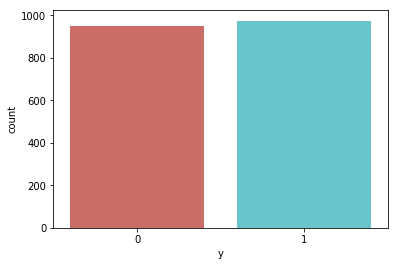

In [0]:
import seaborn as sns
sns.countplot(x='y',data=test,palette='hls')
plt.show()

In [0]:
train['y'].value_counts()

0    3859
1    3835
Name: y, dtype: int64

In [0]:
test['y'].value_counts()

1    974
0    950
Name: y, dtype: int64

**Our classes are balanced.**

In [0]:
Xt = train['words'].values 
Xtt=["".join(review) for review in Xt]
yt = train['y'].values

Xv = test['words'].values 
yv = test['y'].values
Xvv=["".join(review) for review in Xv]

### Defining Stop Words

In [0]:
stp = nltk.corpus.stopwords.words('english')
with open('./stopwords_eng.txt', 'w') as outfile:
    outfile.write('\n'.join(stp))
    
    
with open('./stopwords_eng.txt', 'r') as infile:
    stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:5])

stop words ['i', 'me', 'my', 'myself', 'we'] ...


### Vectorizers: Count and Tfidf

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()

def porter_tokenizer(text, stemmer=porter_stemmer):
    """
    A Porter-Stemmer-Tokenizer hybrid to splits sentences into words (tokens) 
    and applies the porter stemming algorithm to each of the obtained token. 
    Tokens that are only consisting of punctuation characters are removed as well.
    Only tokens that consist of more than one letter are being kept.
    
    Parameters
    ----------
        
    text : `str`. 
      A sentence that is to split into words.
        
    Returns
    ----------
    
    no_punct : `str`. 
      A list of tokens after stemming and removing Sentence punctuation patterns.
    
    """
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

tfidf = TfidfVectorizer(encoding='utf-8',decode_error='replace',strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer
    )

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(2,2)
    )
#vectorizer = CountVectorizer(analyzer = "word",encoding='utf-8',
 #           decode_error='replace',
  #          strip_accents='unicode', tokenizer = None, preprocessor = None,stop_words = None, max_features = 10000)

#### Testing the count vectorizer

In [0]:
vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'The swimmer likes swimming.'])
sentence2 = vec.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['like swim', 'swim swim', 'swimmer like']
Sentence 1: [[1 0 1]]
Sentence 2: [[0 0 0]]


In [0]:
vec = vec.fit(Xtt)

print('Vocabulary size: %s' %len(vec.get_feature_names()))

Vocabulary size: 103883


#### Testing tfid vectorizer

In [0]:
vocab = ["123 1 The\n swimmer likes swimming so he swims. Don't didn`t"]

tfidf = tfidf.fit(vocab)

sentence1 = tfidf.transform([u'The swimmer likes swimming.'])
sentence2 = tfidf.transform(['The\nswimmer \nswims.'])


print('TEST:')
print('Vocabulary: %s' %tfidf.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['like', 'swim', 'swimmer']
Sentence 1: [[0.57735027 0.57735027 0.57735027]]
Sentence 2: [[0.         0.70710678 0.70710678]]


In [0]:
tfidf = tfidf.fit(Xtt)

print('Vocabulary size: %s' %len(tfidf.get_feature_names()))

Vocabulary size: 11622


In [0]:
print('Vocabulary: %s' %tfidf.get_feature_names())

Vocabulary: ['aaa', 'aam', 'aang', 'aaron', 'ab', 'abagnal', 'abandon', 'abberlin', 'abbi', 'abbott', 'abbrevi', 'abdic', 'abduct', 'abductor', 'abi', 'abil', 'abl', 'abo', 'aboard', 'aborigin', 'abort', 'abortionist', 'abou', 'abra', 'abracatast', 'abraham', 'abroa', 'abroad', 'abrupt', 'absenc', 'absent', 'absolut', 'absor', 'absorb', 'abstract', 'abu', 'abus', 'abusetru', 'abusetwo', 'abusi', 'ac', 'academi', 'acc', 'accent', 'accentu', 'accept', 'access', 'accid', 'accident', 'accidenta', 'acclaim', 'acclim', 'accomplish', 'accord', 'account', 'accumul', 'accuraci', 'accus', 'ace', 'achiev', 'acid', 'acorn', 'acr', 'acro', 'acrophobia', 'across', 'act', 'action', 'activ', 'activist', 'activit', 'actor', 'actress', 'actual', 'ad', 'adalin', 'adam', 'adap', 'adapt', 'addi', 'addict', 'addictionsecret', 'addl', 'address', 'adelaid', 'adida', 'adjust', 'administr', 'admir', 'admiss', 'admit', 'admonit', 'adolesc', 'adolf', 'adopt', 'ador', 'adorin', 'adrena', 'adrenalin', 'adrian', 'ad

In [0]:
b = tfidf.transform(['aang'])
print('TEST:')
print('Sentence 1: %s' %b.toarray())

TEST:
Sentence 1: [[0. 0. 1. ... 0. 0. 0.]]


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True)

In [0]:
yt=yt.astype('int')
yv=yv.astype('int')

We can find ROC curves via various methods for different Vectorizers and NB models but due to lack of computational power, we choose the same vectorizer and NB classifier as Raschka.

In [0]:
final_clf = Pipeline([
                ('vect', TfidfVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf.fit(Xtt, yt)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...se_idf=True, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Confusion Matrix

For Training dataset

C:\Users\aleen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


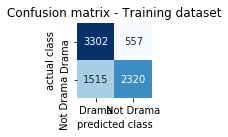

In [0]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import StratifiedKFold
from scipy import interp


cm = metrics.confusion_matrix(yt, final_clf.predict(Xtt))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['Drama','Not Drama'],
            xticklabels=['Drama','Not Drama'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('cnfm.jpg', dpi=300)
plt.show()

For Validation dataset

In [0]:
Xv = test['words'].values 
yv = test['y'].values
Xvv=["".join(review) for review in Xv]

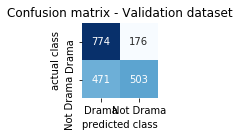

In [0]:
cm = metrics.confusion_matrix(yv, final_clf.predict(Xvv))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['Drama','Not Drama'],
            xticklabels=['Drama','Not Drama'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('cmatrix.jpg', dpi=300)
plt.show()

### Accuracy, Precision, Recall, and F1-score

In [0]:
from sklearn import metrics

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [0]:
yt.dtype

dtype('int32')

In [0]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [0]:
d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=Xtt, y_true=yt))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=Xtt, y_true=yt))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=Xtt, y_true=yt))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=Xtt, y_true=yt))
#d['ROC AUC (%)'].append(auc_scorer(estimator=final_clf, X=Xtt, y_true=yt))

d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=Xvv, y_true=yv))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=Xvv, y_true=yv))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=Xvv, y_true=yv))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=Xvv, y_true=yv))
#d['ROC AUC (%)'].append(auc_scorer(estimator=final_clf, X=Xvv, y_true=yv))

In [0]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%)
Training,73.07,80.64,60.50,69.13
Validation,66.37,74.08,51.64,60.86


## Alternate Classifier
Data is not likely to be linearly seperable so we rule out our choice of SVM Let us consider logistic regression
### Logistic Regression

Training Data

In [0]:
X=tfidf.transform(Xtt)
X=X.toarray()

In [0]:
X.shape

(7694, 11622)

In [0]:
np.unique(X)

array([0.        , 0.0059579 , 0.00597113, ..., 0.63620284, 0.72710441,
       0.72785227])

In [0]:
yt.shape

(7694,)

In [0]:
from scipy.optimize import minimize
theta = np.zeros((11622,))
res = minimize(fun=compute_cost, x0=theta, args=(X,yt), jac=compute_gradient, method='BFGS')
compute_cost(res.x,X,yt)

0.6664192660827196

In [0]:
theta=0.6664192660827196

#### Model Fitting

In [0]:
from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, yt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, yt)))

Accuracy of logistic regression classifier on test set: 0.74


#### Confusion Matrix
Training Data

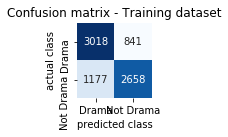

In [0]:
cm = metrics.confusion_matrix(yt, y_pred)

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['Drama','Not Drama'],
            xticklabels=['Drama','Not Drama'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('cmatlog.jpg', dpi=300)
plt.show()

#### ROC Curve

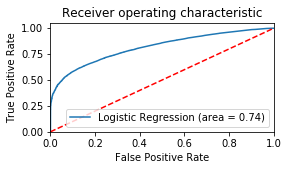

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yt, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(yt, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Test dataset

In [0]:
Xv1=tfidf.transform(Xvv)
Xv1 = Xv1.toarray() 
Xv1.shape

(1924, 11622)

In [0]:
logreg.fit(Xv1, yv)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
yv_pred = logreg.predict(Xv1)

#### Confusion Matrix

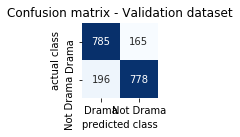

In [0]:
cm = metrics.confusion_matrix(yv, yv_pred)

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['Drama','Not Drama'],
            xticklabels=['Drama','Not Drama'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('cmatlog1.jpg', dpi=300)
plt.show()

#### ROC Curve

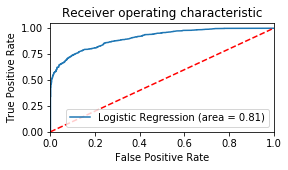

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yv, logreg.predict(Xv1))
fpr, tpr, thresholds = roc_curve(yv, logreg.predict_proba(Xv1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Accuracy, Precision, Recall and F1-Score
#### Logistic Regression

In [0]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [0]:
d['ACC (%)'].append(metrics.accuracy_score(yt, y_pred))
d['PRE (%)'].append(metrics.precision_score(yt, y_pred))
d['REC (%)'].append(metrics.recall_score(yt, y_pred))
d['F1 (%)'].append(metrics.f1_score(yt, y_pred))

d['ACC (%)'].append(metrics.accuracy_score(yv, yv_pred))
d['PRE (%)'].append(metrics.precision_score(yv, yv_pred))
d['REC (%)'].append(metrics.recall_score(yv, yv_pred))
d['F1 (%)'].append(metrics.f1_score(yv, yv_pred))

In [0]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%)
Training,73.77,75.96,69.31,72.48
Validation,81.24,82.50,79.88,81.17
